In [1]:
from utils import *
from matplotlib import pyplot as plt

In [2]:
# generate object
setup = {
    'N': 8192*2,
    'L': 2e-3, # 1mm
    'lambda_0': 650e-9, # 650nm, red light
    'f1': 45e-3, # 45mm
    'f2': 25e-3, # 25mm
    'A': 5e-3, # 5mm
    'plot': True
}
n = setup['N']
sample_size = 4096
sample = test_sum(sample_size, a=255, n_cycles=512, sigma=0.1)
object = np.zeros(n, dtype=np.complex128)
object = center_splice(object, sample)

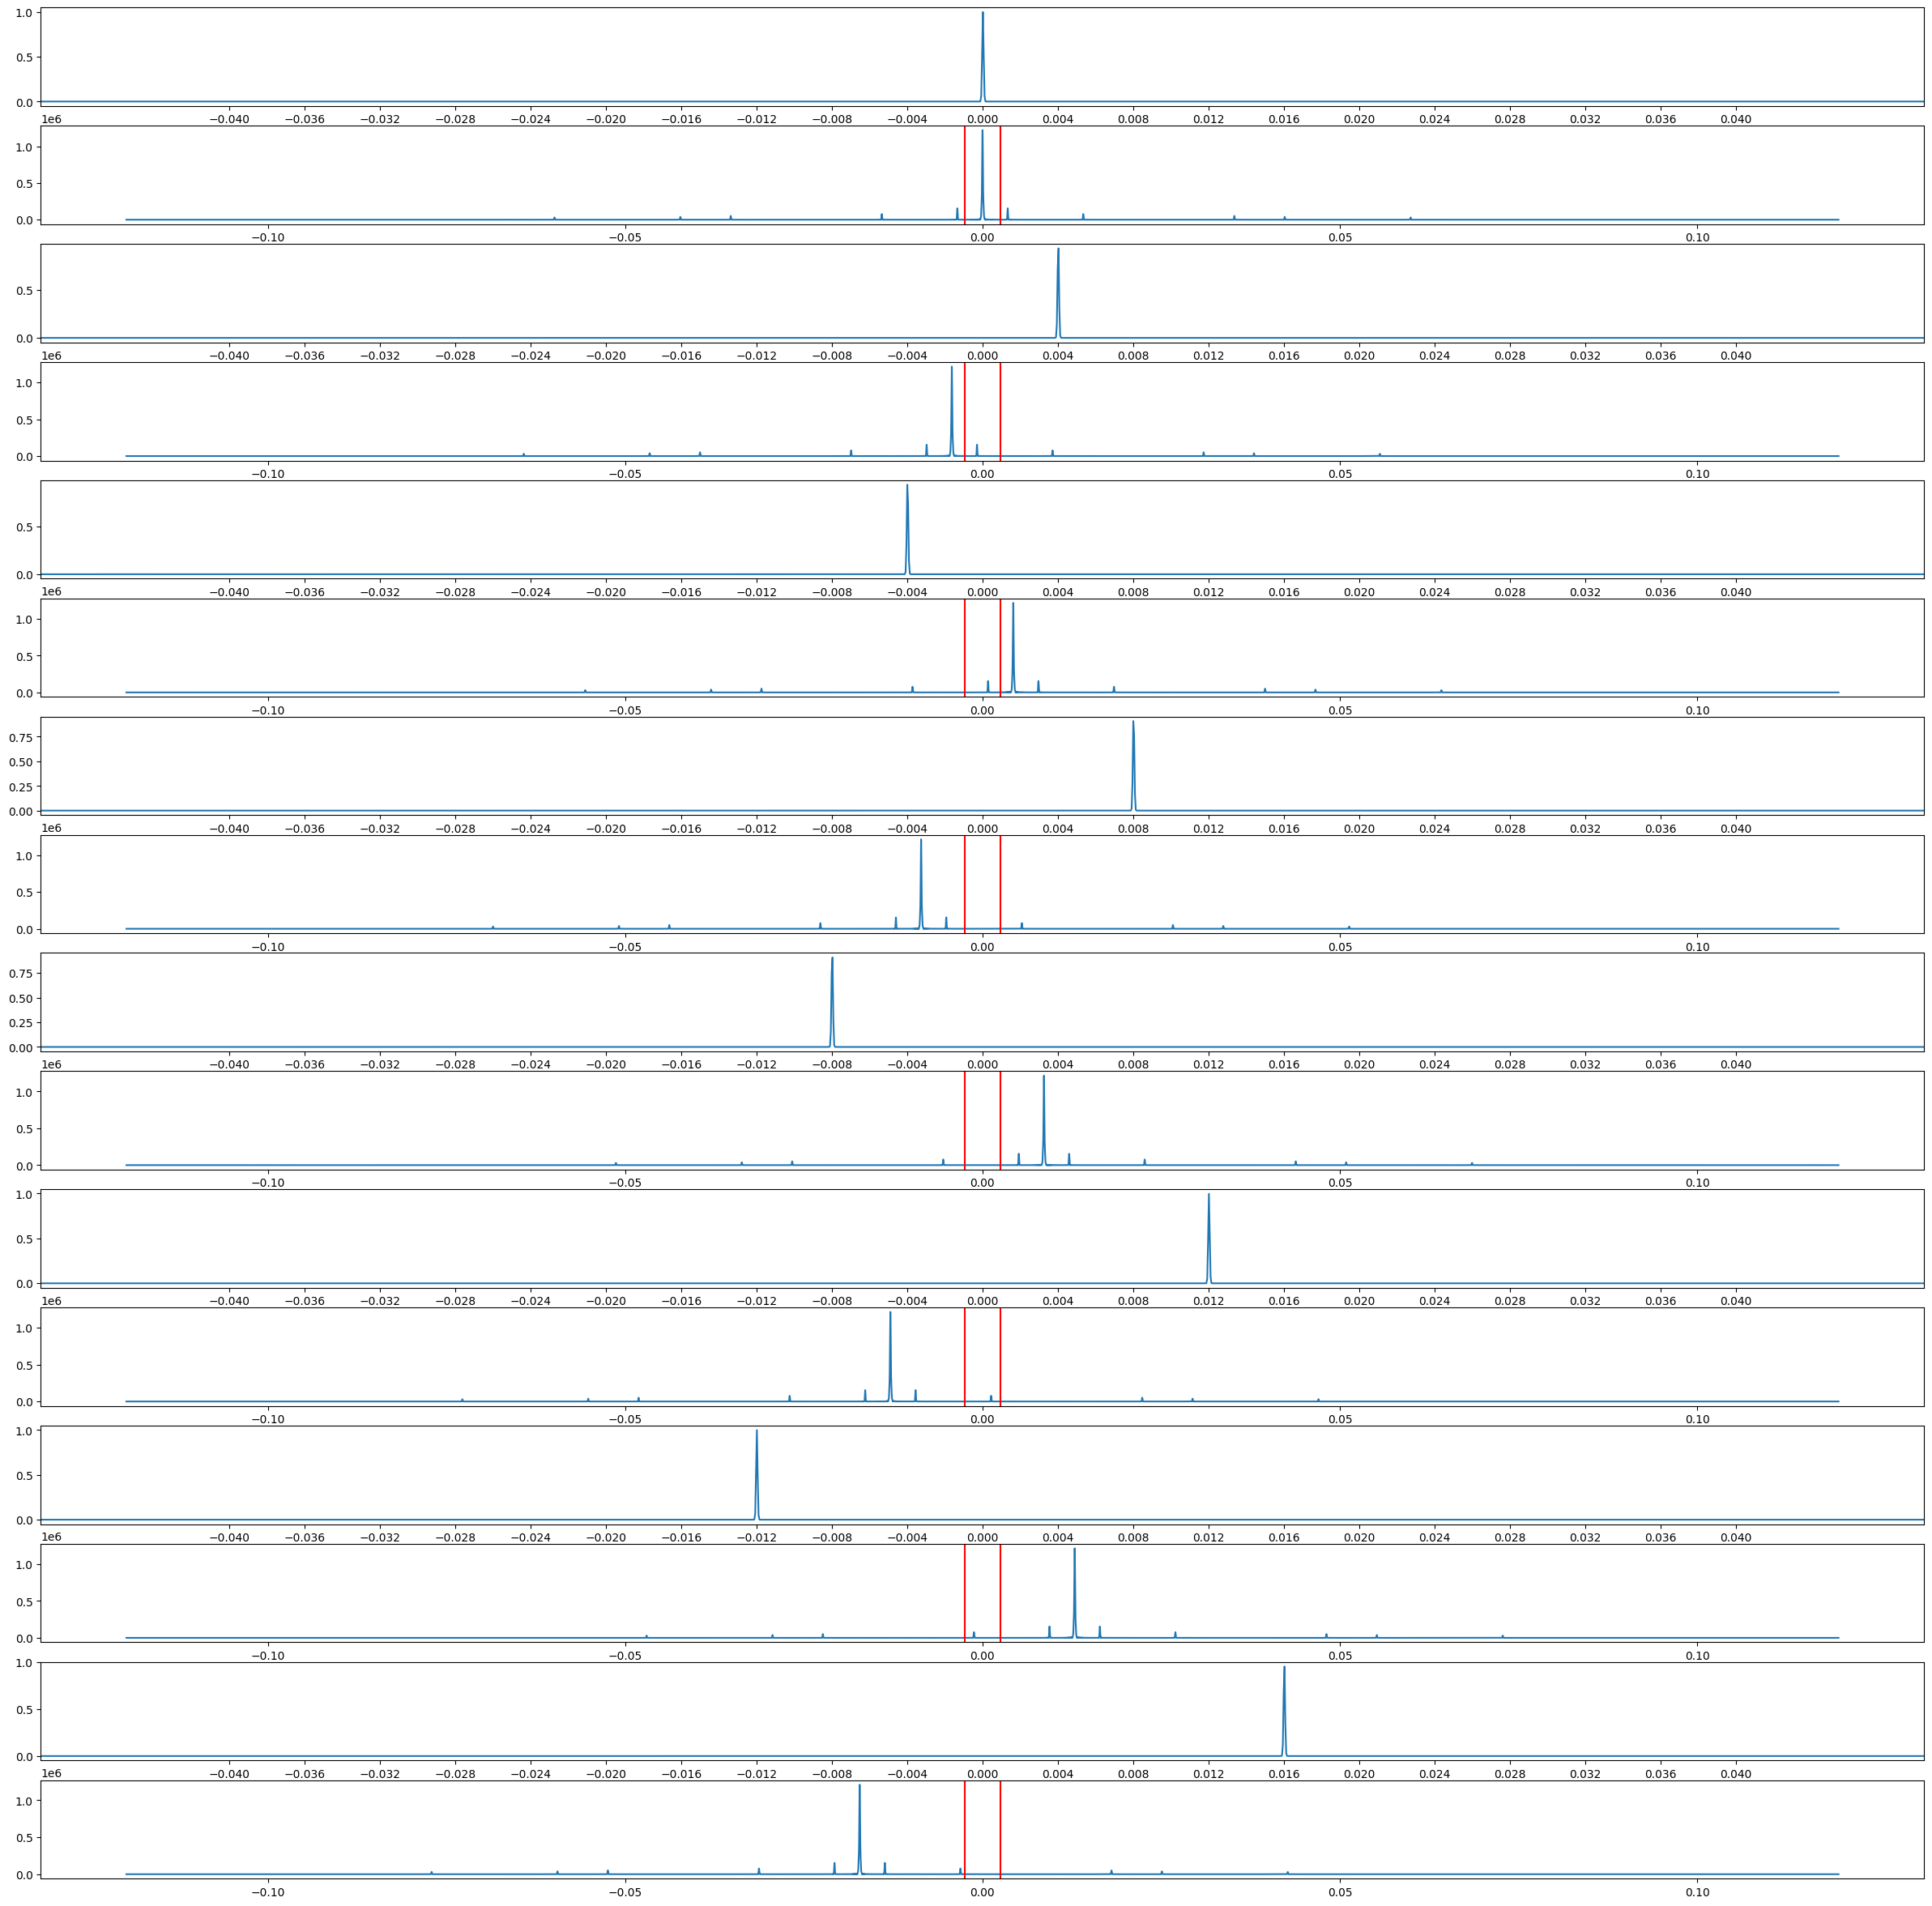

In [3]:
_, ax = plt.subplots(16, 1, figsize=(30, 30))

# compute coordinates for aperture field
kx = np.fft.fftfreq(setup['N'], d=setup['L']/setup['N'])
kx = np.fft.fftshift(kx)*setup['lambda_0']*setup['f1']

for i, (x, units) in enumerate(led_array(n_leds=8, spacing=4e-3)):
    x_out, _ = propogate_field(x)
    x_field = np.zeros(n, dtype=np.complex128)
    x_field[n//2-5000//2:n//2+5000//2] = x_out
    object_field = x_field * object
    
    # output = image(object_field, setup)
    
    ax[2*i].plot(units, np.abs(x))
    ax[2*i].set_xticks([i*4e-3 for i in range(-10,11)])
    ax[2*i].set_xlim(-0.05, 0.05)
    ax[2*i+1].plot(kx, np.abs(fft(object_field)))
    ax[2*i+1].axvline(x=setup['A']/2, color='r')
    ax[2*i+1].axvline(x=-setup['A']/2, color='r')